In [ ]:
require(readr)
require(mgcv)
require(mgcvViz)
require(partykit)
require(itsadug)
require(languageR)
require(lattice)

In [2]:
popt = function(w, h, r=200) { options(repr.plot.width=w, repr.plot.height=h, repr.plot.res=r) }

In [3]:
# the "dist_" in "log_dist_range" and "dist_mtop5" means similarity. 
# They are already transformed to similarities in data preparation steps.
data = read_csv("../data/meld_bisyll_nw.csv")
data$RTinv = -1000/data$RT
data$logERR = log(data$ERR+1)
data$log_dist_range = log(data$dist_range)
data$C1lognwf = log(data$C1nwf+1)
data$C2lognwf = log(data$C2nwf+1)
data$C1lognom = log(data$C1nom+1)
data$C2lognom = log(data$C2nom+1)
data$C1lognop = log(data$C1nop+1)
data$C2lognop = log(data$C2nop+1)

Rows: 10022 Columns: 22

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): word
dbl (21): id, lexicality, N, RT, RTSD, zRT, zRTSD, ERR, C1stroke, C2stroke, ...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
head(data)

id,word,lexicality,N,RT,RTSD,zRT,zRTSD,ERR,C1stroke,...,dist_mean,RTinv,logERR,log_dist_range,C1lognwf,C2lognwf,C1lognom,C2lognom,C1lognop,C2lognop
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
210023,一<U+8BB3>,2,37,880.3478,340.8290,0.04479982,0.9262310,7.50000,1,...,0.7722696,-1.1359146,2.140066,-3.463743,6.687109,2.079442,2.484907,1.098612,0.6931472,0.6931472
210024,一<U+5356>,2,38,907.0745,362.4958,0.25291430,1.0683960,9.52381,1,...,0.7531907,-1.1024453,2.353640,-2.857580,6.687109,4.007333,2.484907,1.609438,0.6931472,0.6931472
210025,一<U+9636>,2,12,1012.0725,463.3832,0.58263379,1.6049369,71.42857,1,...,0.8893726,-0.9880715,4.282601,-2.536466,6.687109,3.091042,2.484907,1.791759,0.6931472,0.6931472
210026,一<U+89C6>,2,29,904.8062,283.2516,0.25414705,0.8718462,27.50000,1,...,0.7924290,-1.1052090,3.349904,-3.244111,6.687109,4.521789,2.484907,1.945910,0.6931472,0.6931472
210027,一作,2,35,937.7994,362.0582,0.29764826,1.1034553,12.50000,1,...,0.7034359,-1.0663261,2.602690,-2.880227,6.687109,5.225747,2.484907,2.397895,0.6931472,1.0986123
210028,一咐,2,41,824.1400,257.8738,-0.02375656,0.7067070,0.00000,1,...,0.7945036,-1.2133861,0.000000,-3.243435,6.687109,1.098612,2.484907,1.098612,0.6931472,0.6931472


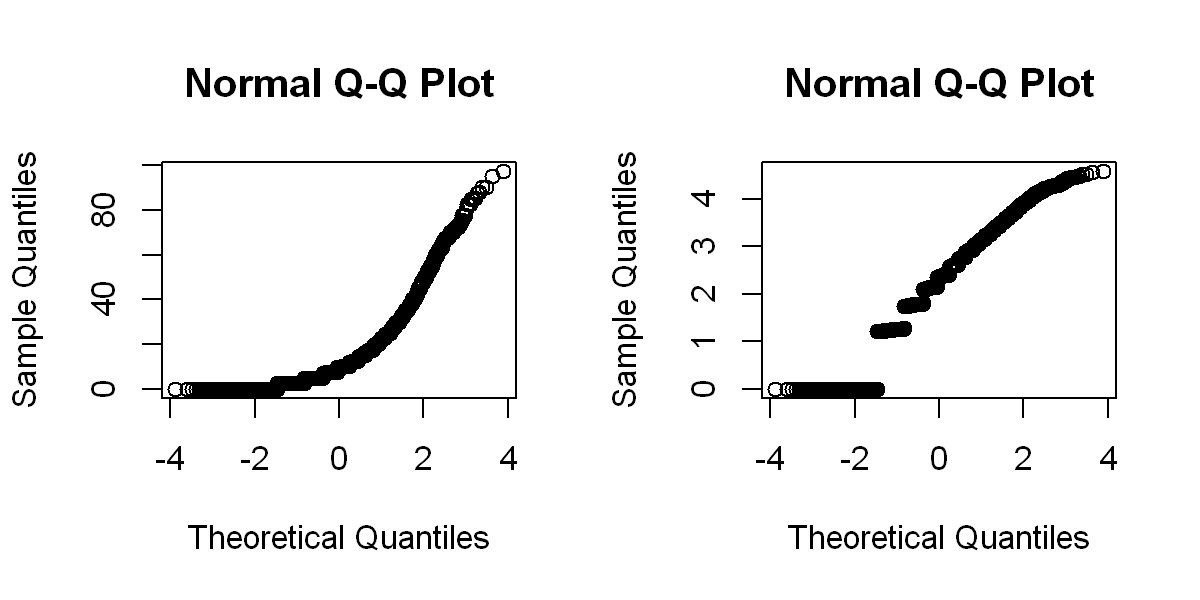

In [5]:
popt(6,3)
par(mfrow=c(1, 2))
qqnorm(data$ERR)
qqnorm(log(data$ERR+1))

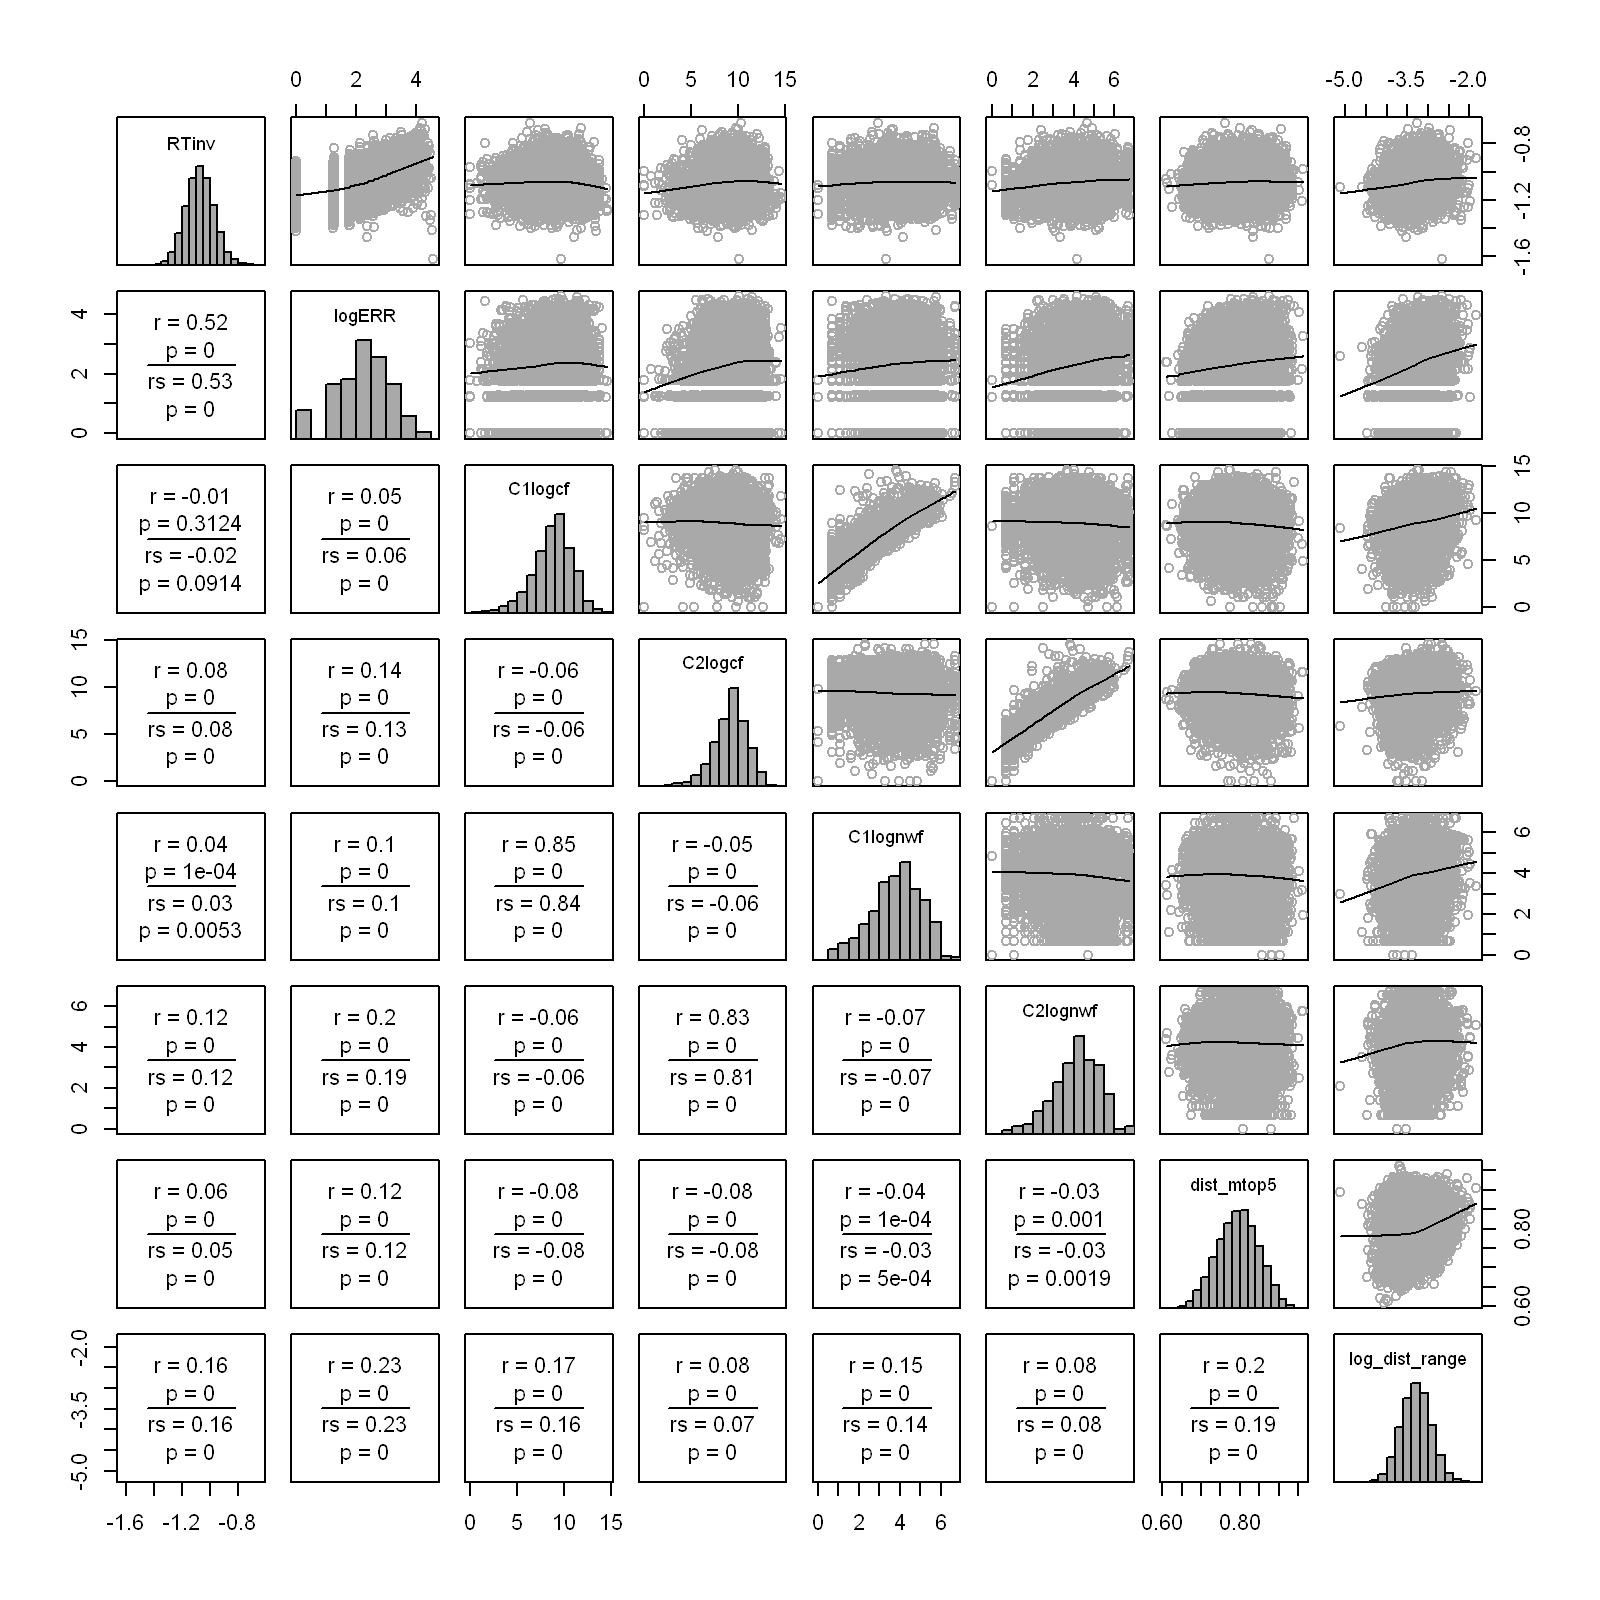

In [6]:
popt(8,8)
pairscor.fnc(data[,strsplit("RTinv,logERR,C1logcf,C2logcf,C1lognwf,C2lognwf,dist_mtop5,log_dist_range", ",")[[1]]])

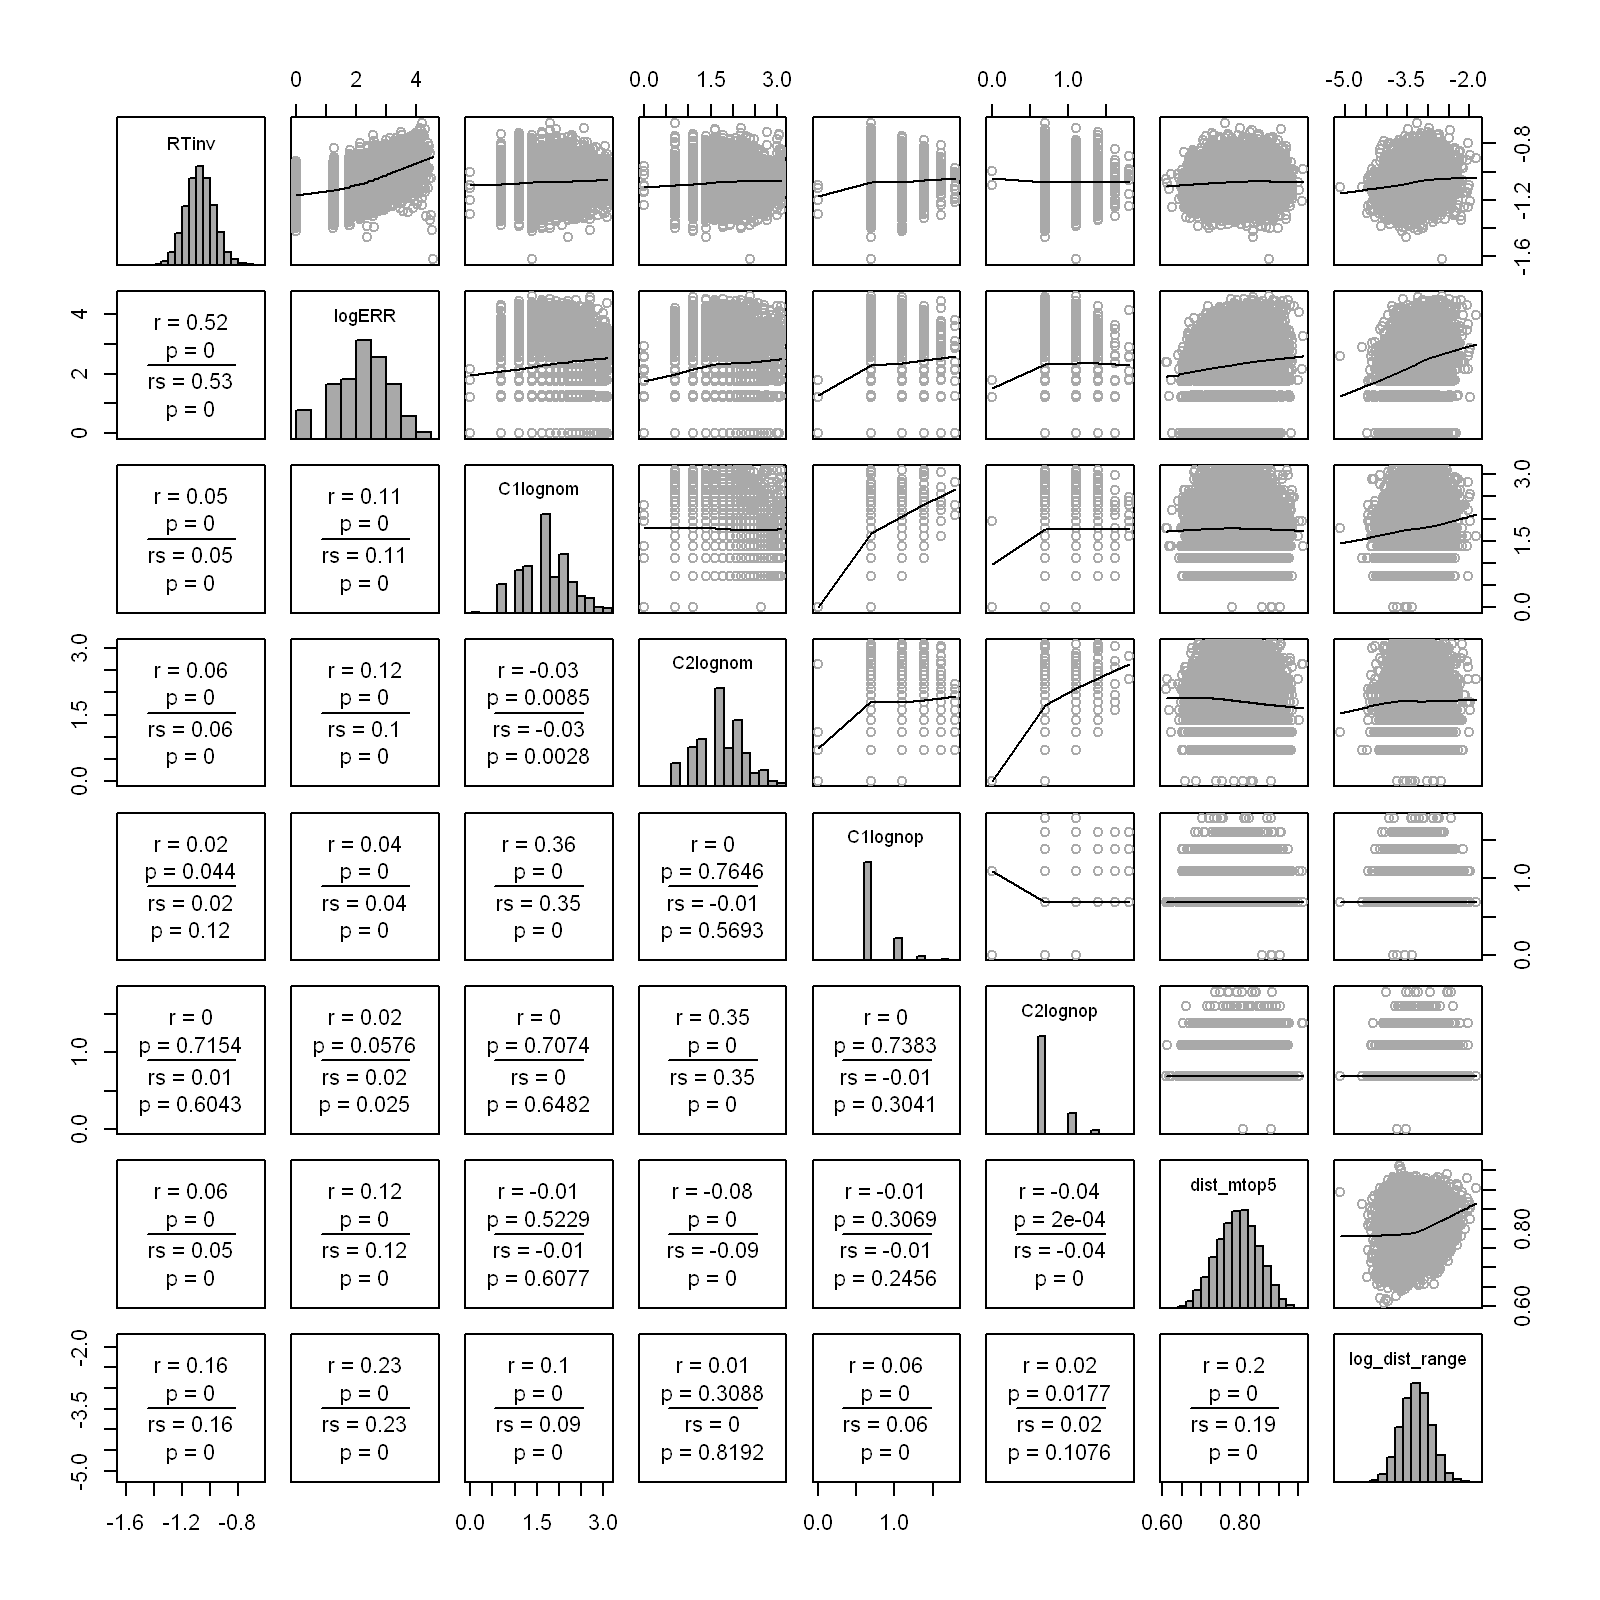

In [7]:
popt(8,8)
pairscor.fnc(data[,strsplit("RTinv,logERR,C1lognom,C2lognom,C1lognop,C2lognop,dist_mtop5,log_dist_range", ",")[[1]]])

## GAM with ERR

### Err.0

In [8]:
err.0 = bam(logERR~s(log_dist_range)+s(dist_mtop5)+
            te(C1lognwf,C2lognwf)+
            te(C1logcf,C2logcf), data=data, method="ML")

In [9]:
summary(err.0)


Family: gaussian 
Link function: identity 

Formula:
logERR ~ s(log_dist_range) + s(dist_mtop5) + te(C1lognwf, C2lognwf) + 
    te(C1logcf, C2logcf)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.22875    0.00885   251.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                         edf Ref.df      F p-value    
s(log_dist_range)      2.733  3.511 106.51  <2e-16 ***
s(dist_mtop5)          2.003  2.556  31.20  <2e-16 ***
te(C1lognwf,C2lognwf)  5.299  6.104  57.67  <2e-16 ***
te(C1logcf,C2logcf)   10.168 12.597  10.38  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.114   Deviance explained = 11.6%
-ML =  13022  Scale est. = 0.78484   n = 10022

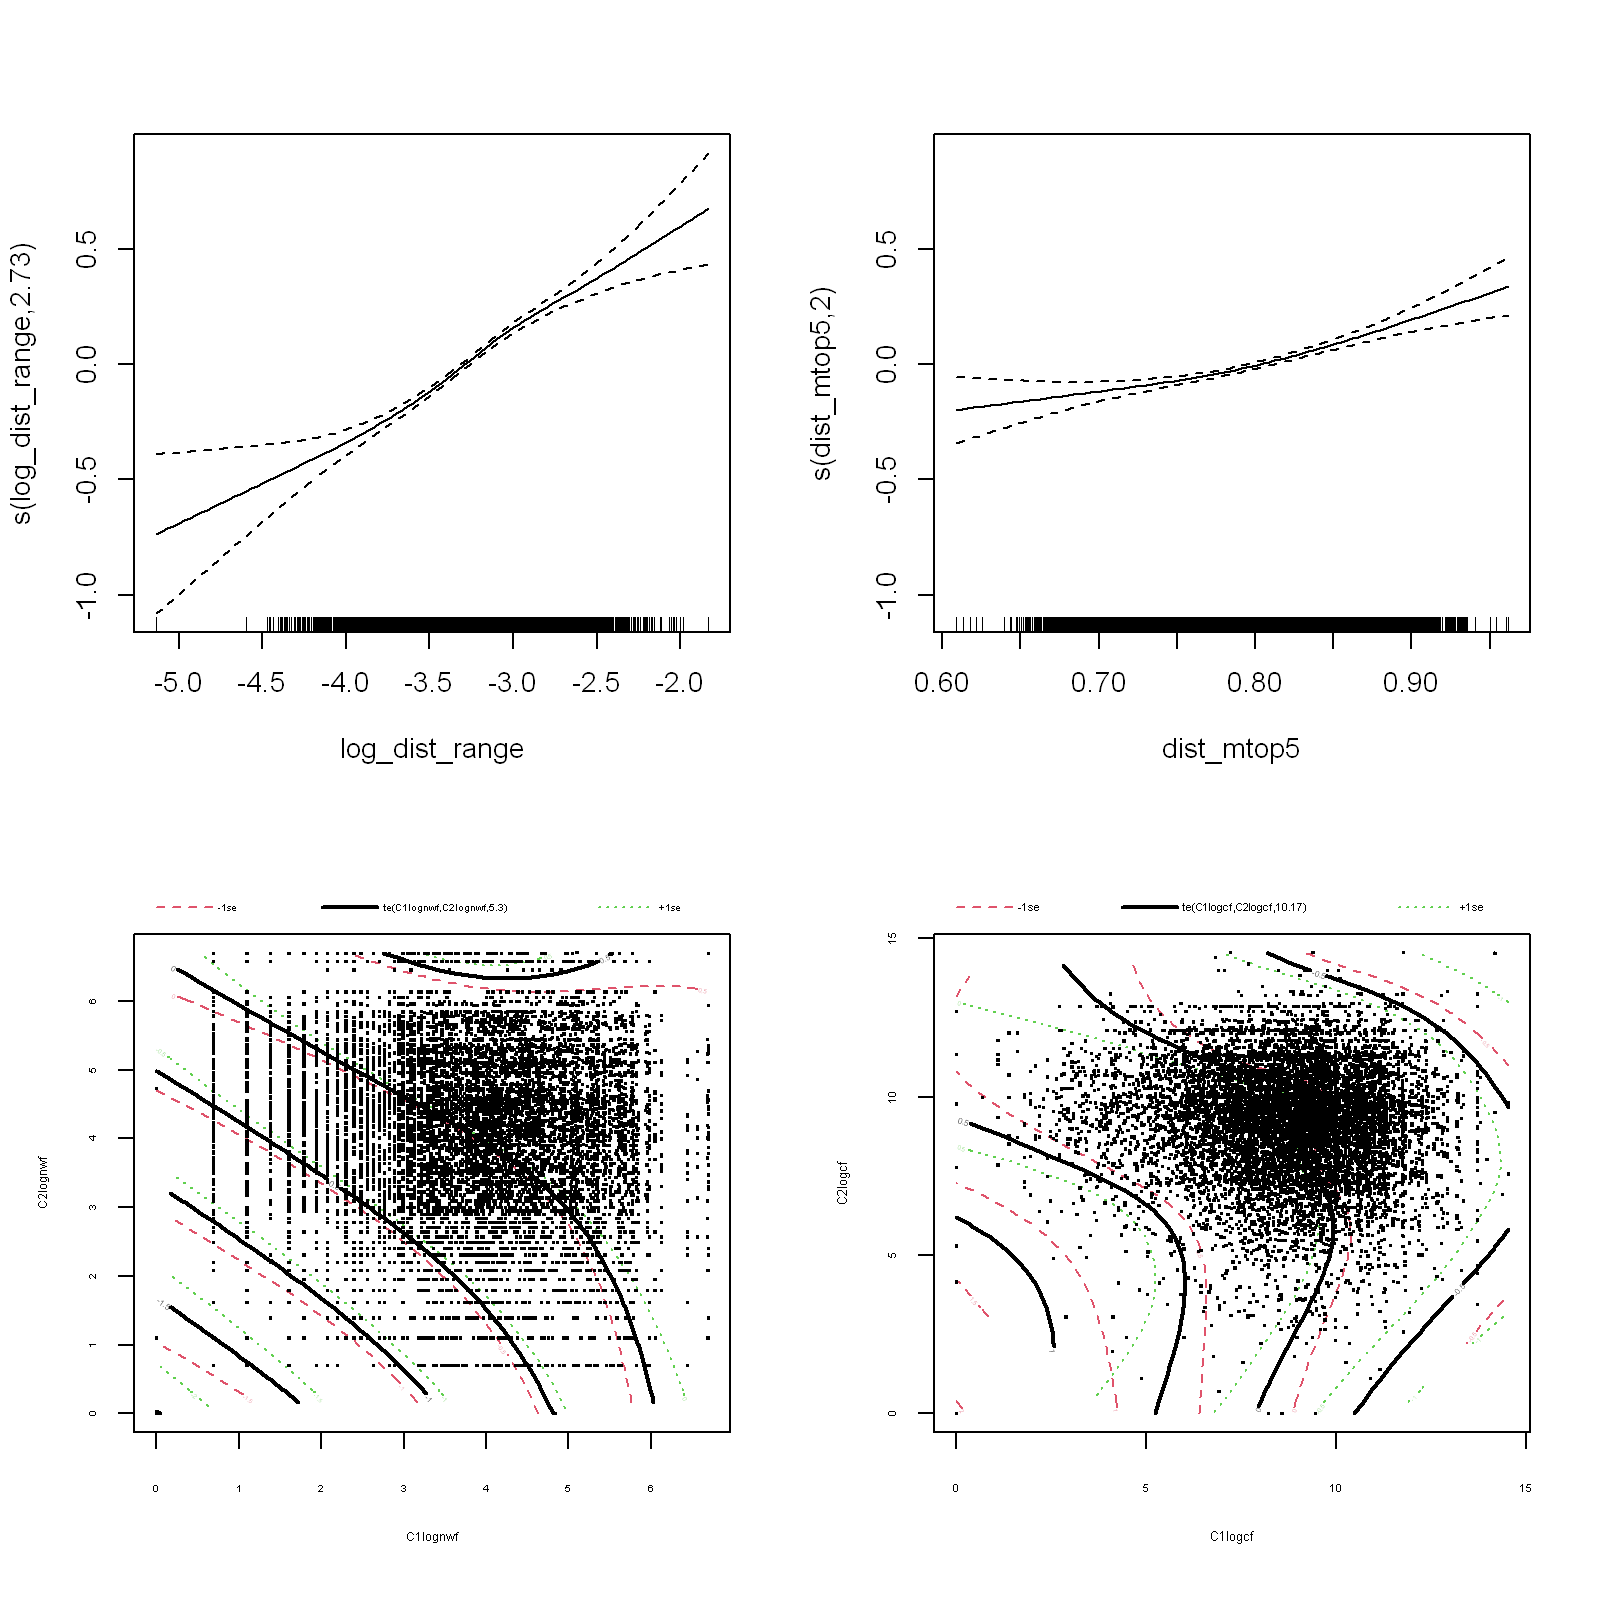

In [10]:
popt(8,8)
plot(err.0, pages=1, rug=T, cex=2)

In [16]:
concurvity(err.0)

,para,s(log_dist_range),s(dist_mtop5),"te(C1lognwf,C2lognwf)","te(C1logcf,C2logcf)"
worst,0.0002084697,0.12843964,0.09700647,0.7811893,0.7819150
observed,0.0002084697,0.12738409,0.08246352,0.7100878,0.6402992
estimate,0.0002084697,0.09152202,0.07164624,0.3953051,0.4088811



Method: ML   Optimizer: outer newton
full convergence after 6 iterations.
Gradient range [-0.002687187,0.002632487]
(score 13021.67 & scale 0.7848406).
Hessian positive definite, eigenvalue range [0.002628958,5011].
Model rank =  67 / 67 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                         k'   edf k-index p-value
s(log_dist_range)      9.00  2.73    1.00    0.58
s(dist_mtop5)          9.00  2.00    1.01    0.71
te(C1lognwf,C2lognwf) 24.00  5.30    1.00    0.42
te(C1logcf,C2logcf)   24.00 10.17    0.99    0.22


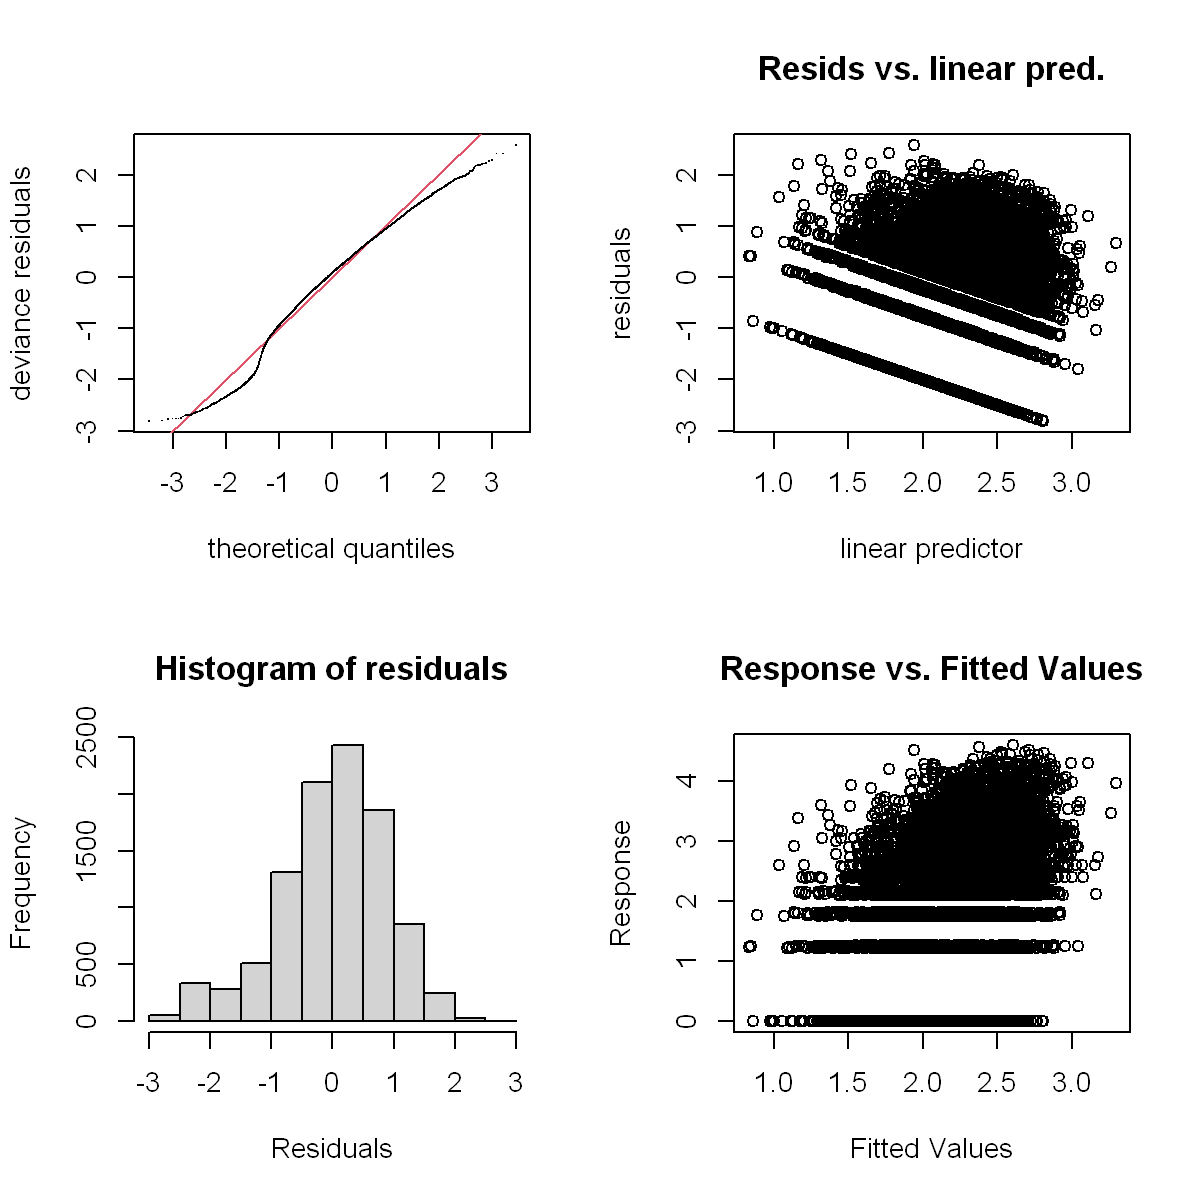

In [11]:
popt(6,6)
gam.check(err.0)

## GAM with RTinv

### RTinv.0

In [12]:
rtinv.0 = bam(RTinv~s(log_dist_range)+s(dist_mtop5)+s(C1stroke)+te(C1lognwf,C2lognwf)+te(C1logcf,C2logcf), data=data, method="ML")

In [13]:
summary(rtinv.0)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_dist_range) + s(dist_mtop5) + s(C1stroke) + te(C1lognwf, 
    C2lognwf) + te(C1logcf, C2logcf)

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.0725381  0.0009667   -1109   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                         edf Ref.df      F p-value    
s(log_dist_range)      3.224  4.120 59.496 < 2e-16 ***
s(dist_mtop5)          1.001  1.001  7.664 0.00563 ** 
s(C1stroke)            3.901  4.811 38.271 < 2e-16 ***
te(C1lognwf,C2lognwf)  6.201  7.076 29.212 < 2e-16 ***
te(C1logcf,C2logcf)   12.015 14.811 12.231 < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0779   Deviance explained = 8.03%
-ML = -9161.6  Scale est. = 0.0093648  n = 10022

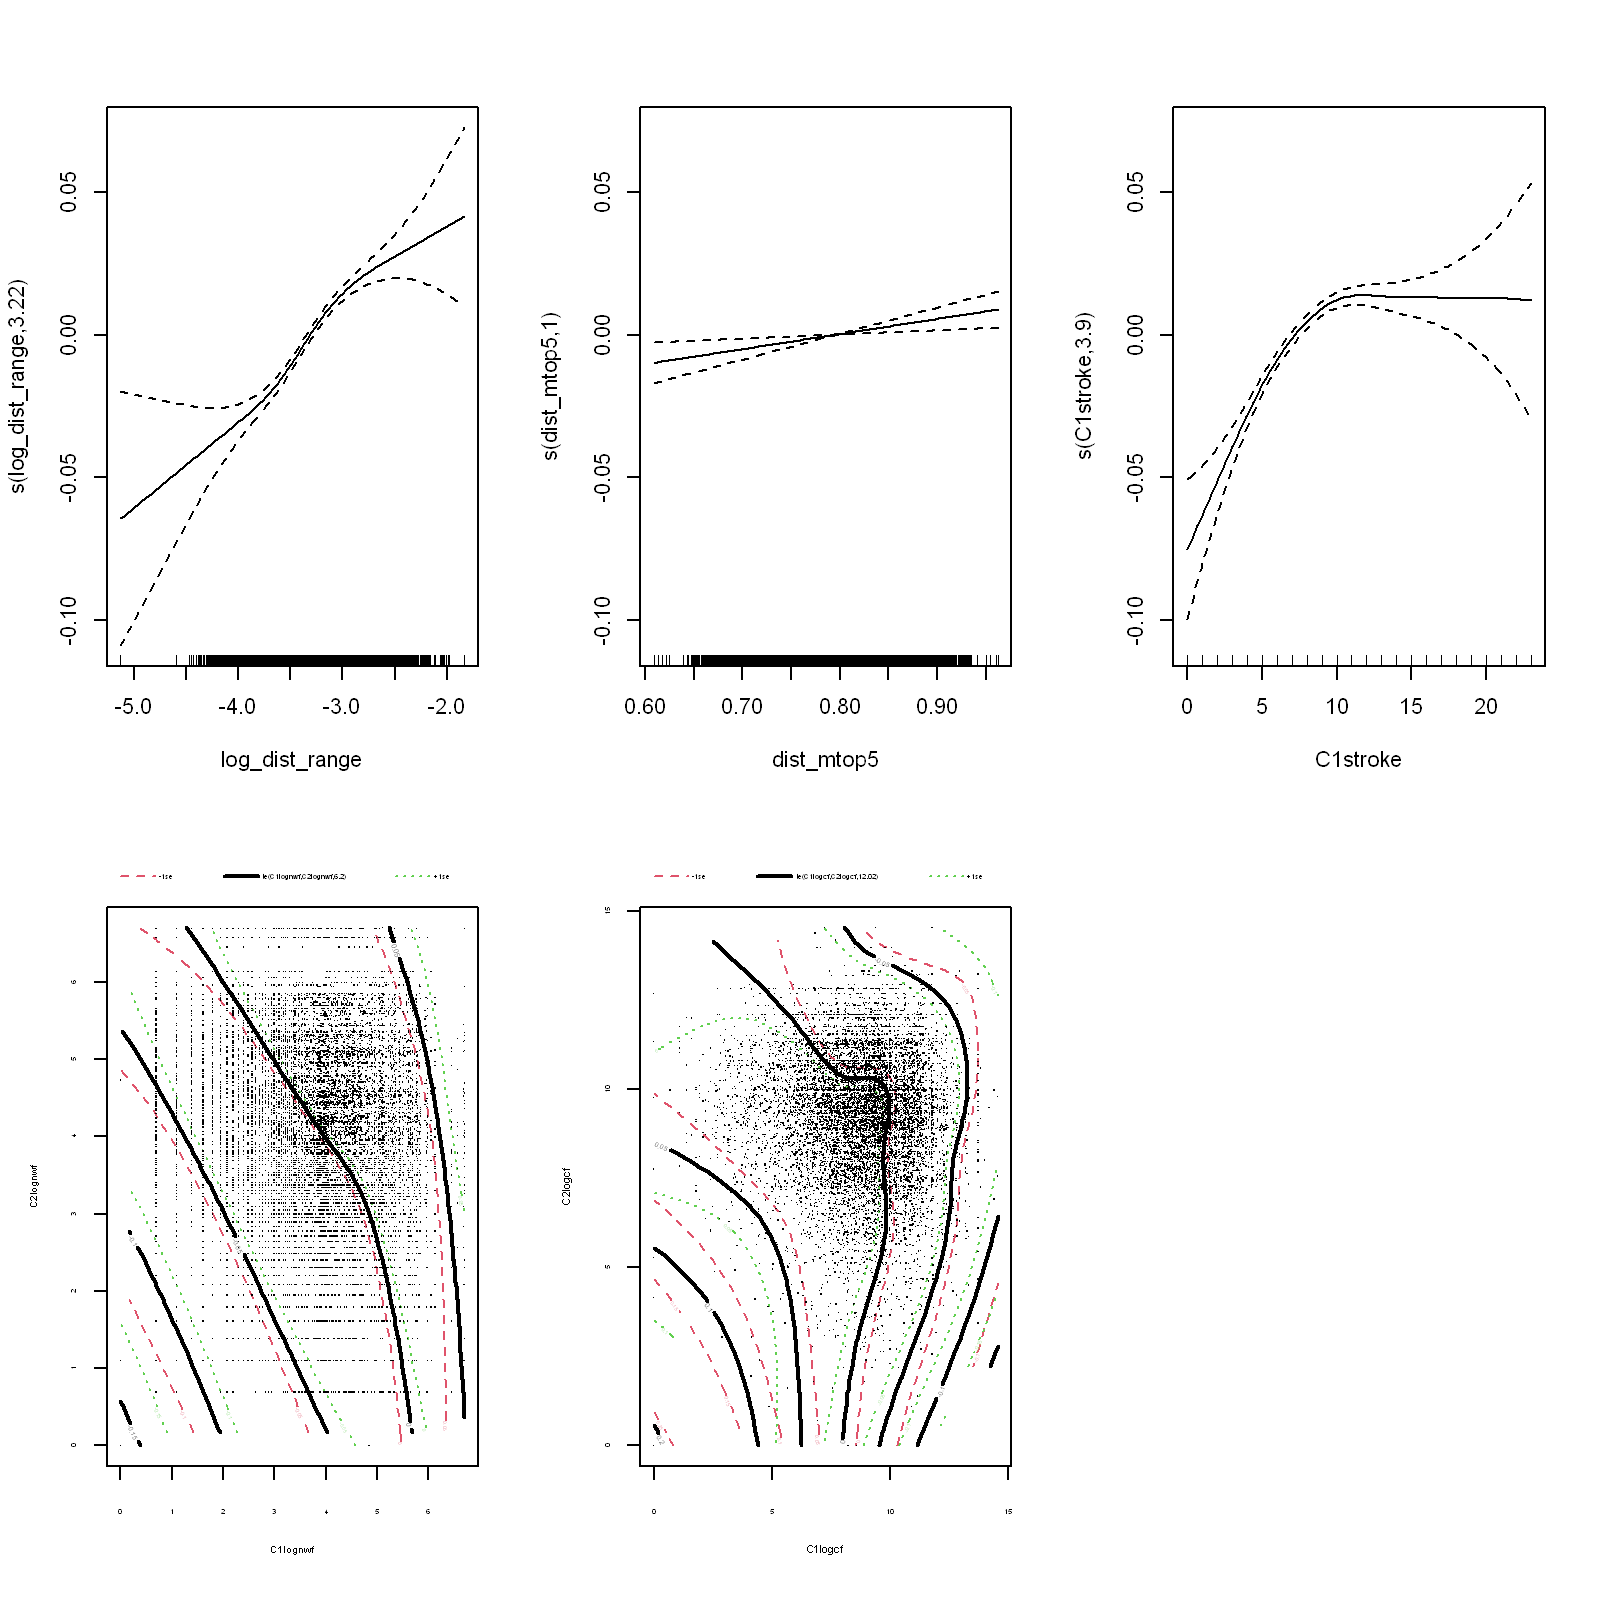

In [14]:
popt(8,8)
plot(rtinv.0, pages=1, rug=T)

In [17]:
concurvity(rtinv.0)

,para,s(log_dist_range),s(dist_mtop5),s(C1stroke),"te(C1lognwf,C2lognwf)","te(C1logcf,C2logcf)"
worst,0.0003993751,0.12889311,0.09829676,0.3461695,0.7864631,0.7850622
observed,0.0003993751,0.12622270,0.09106258,0.2863198,0.7224491,0.5866743
estimate,0.0003993751,0.09179055,0.07326332,0.2398494,0.3990962,0.4110108



Method: ML   Optimizer: outer newton
full convergence after 8 iterations.
Gradient range [-0.002115196,0.002767501]
(score -9161.569 & scale 0.009364833).
Hessian positive definite, eigenvalue range [0.0007888012,5011.002].
Model rank =  76 / 76 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                         k'   edf k-index p-value  
s(log_dist_range)      9.00  3.22    1.02    0.98  
s(dist_mtop5)          9.00  1.00    0.99    0.26  
s(C1stroke)            9.00  3.90    1.02    0.84  
te(C1lognwf,C2lognwf) 24.00  6.20    1.01    0.74  
te(C1logcf,C2logcf)   24.00 12.02    0.98    0.03 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


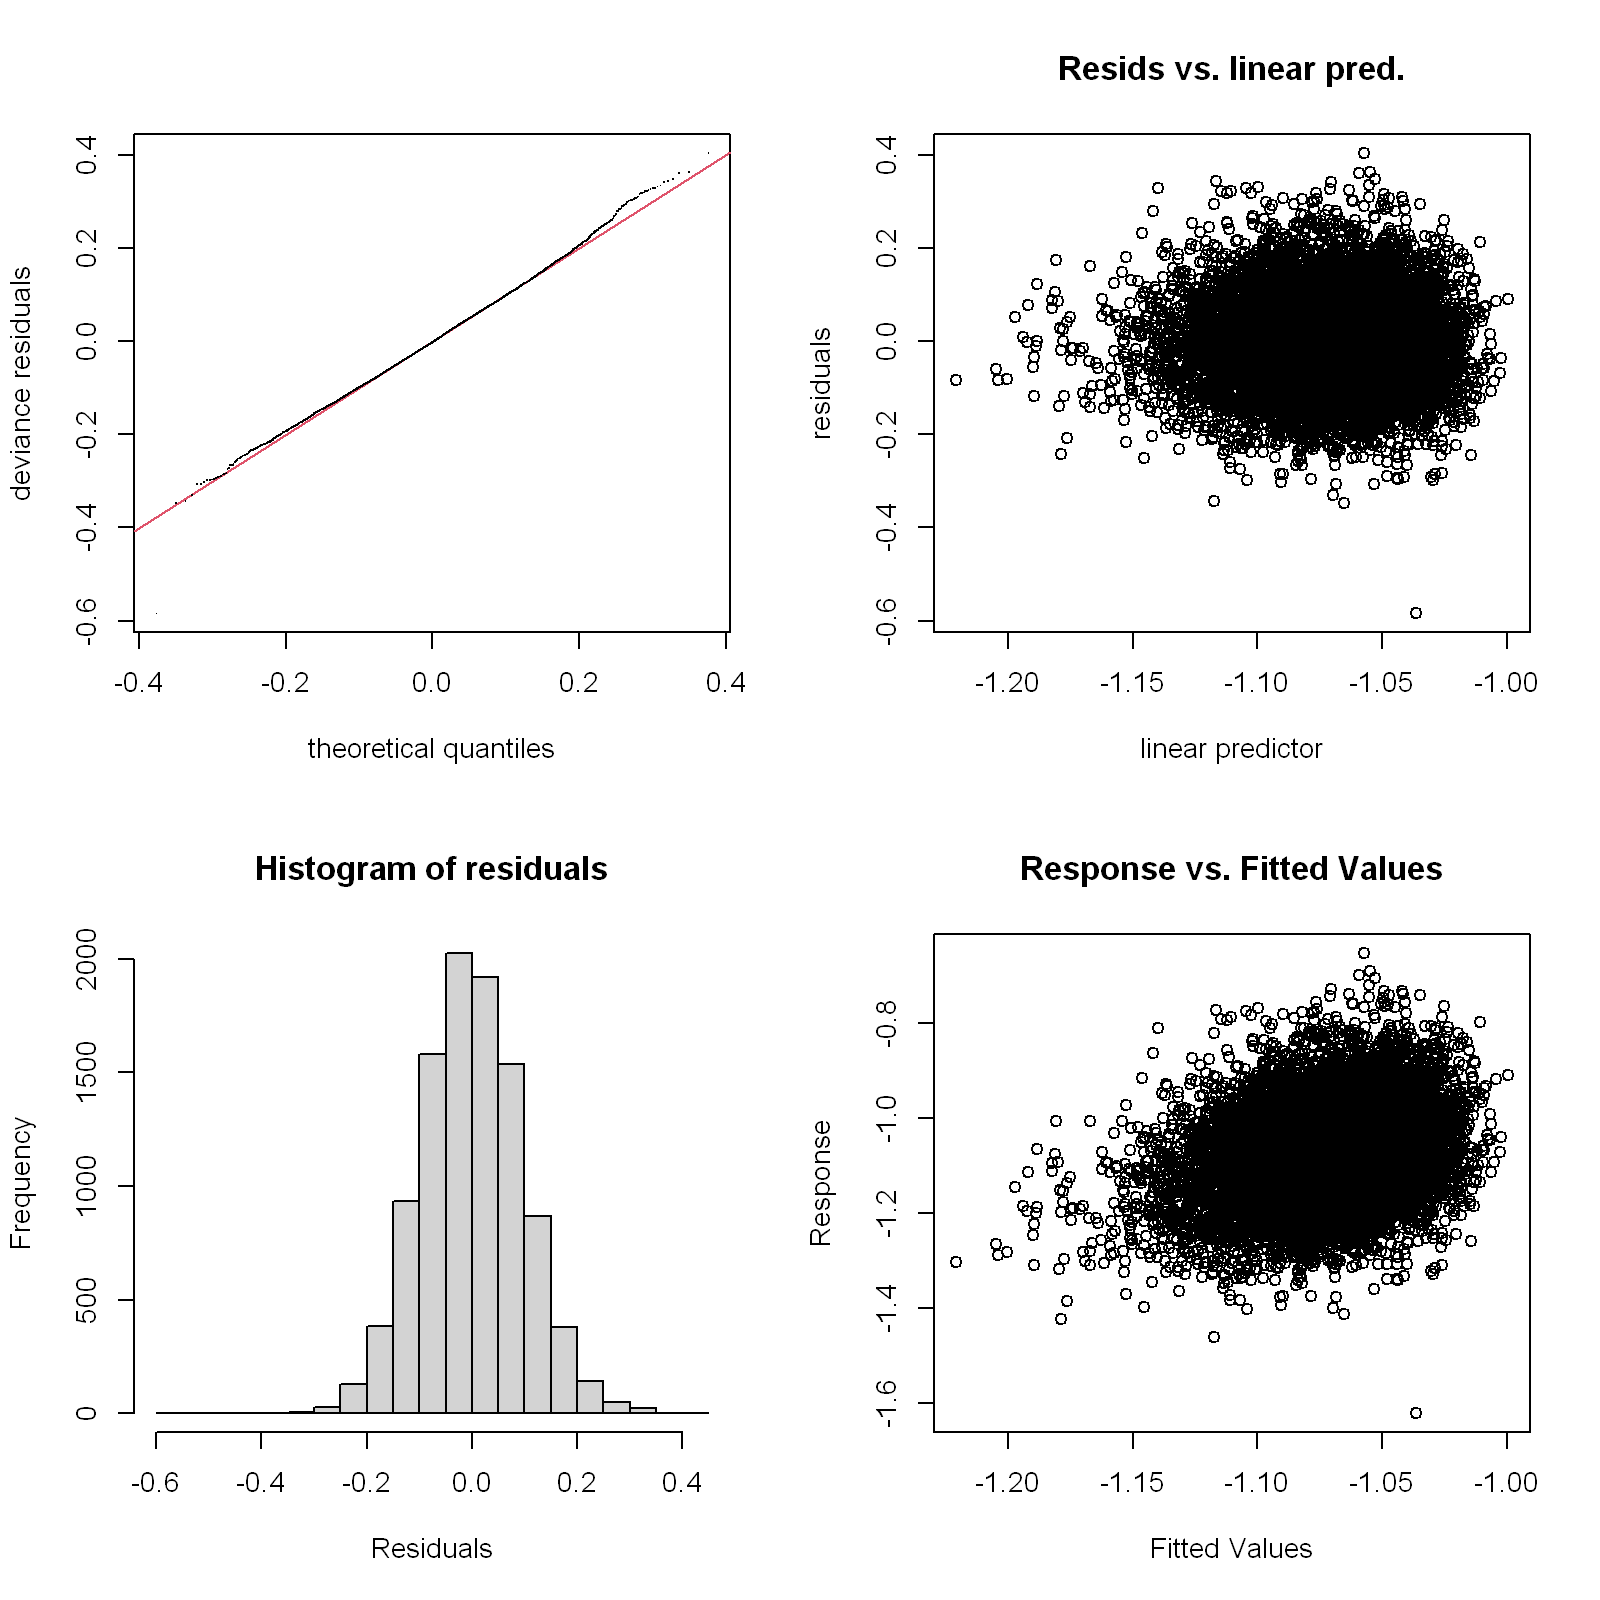

In [15]:
gam.check(rtinv.0)